- 이미지에서 코너는 이미지의 특성 (features)를 파악하기에 매우 좋은 요소
### 코너를 찾아서 이미지의 특성을 검출하는 방법이 매우 유용함
# Harris Coner detection
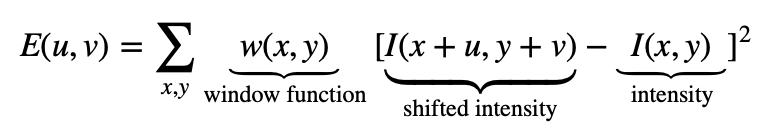
- window function : rectangular window or Gasussian window ( gives weights to pixels )


- E(u, v)를 최대화해야 모서리를 탐지할 수 있는데 shifted intensity & intensity를 최대화해야 함
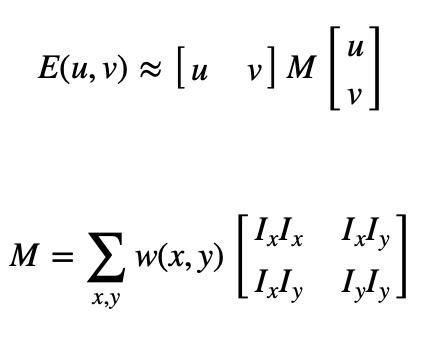
- Ix 와 Iy는 x와 y방향의 편미분 값이다
- When |R| is small, which happens when λ1 and λ2 are small, the region is flat.
- When R<0, which happens when λ1>>λ2 or vice versa, the region is edge.
- When R is large, which happens when λ1 and λ2 are large and λ1∼λ2, the region is a corner.

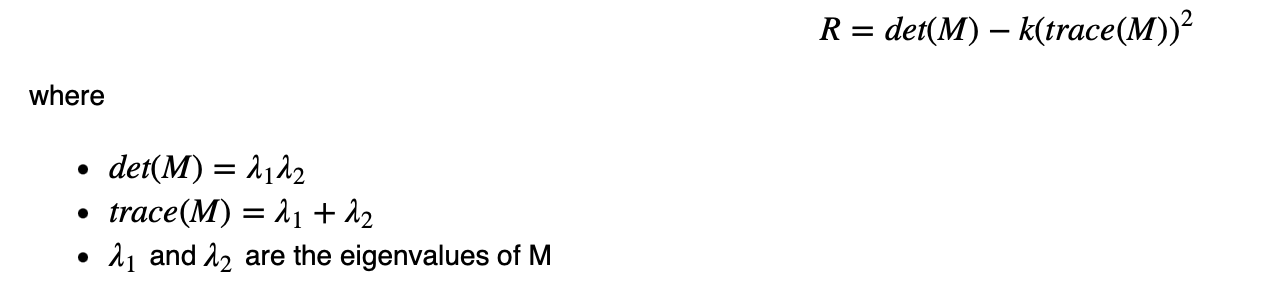
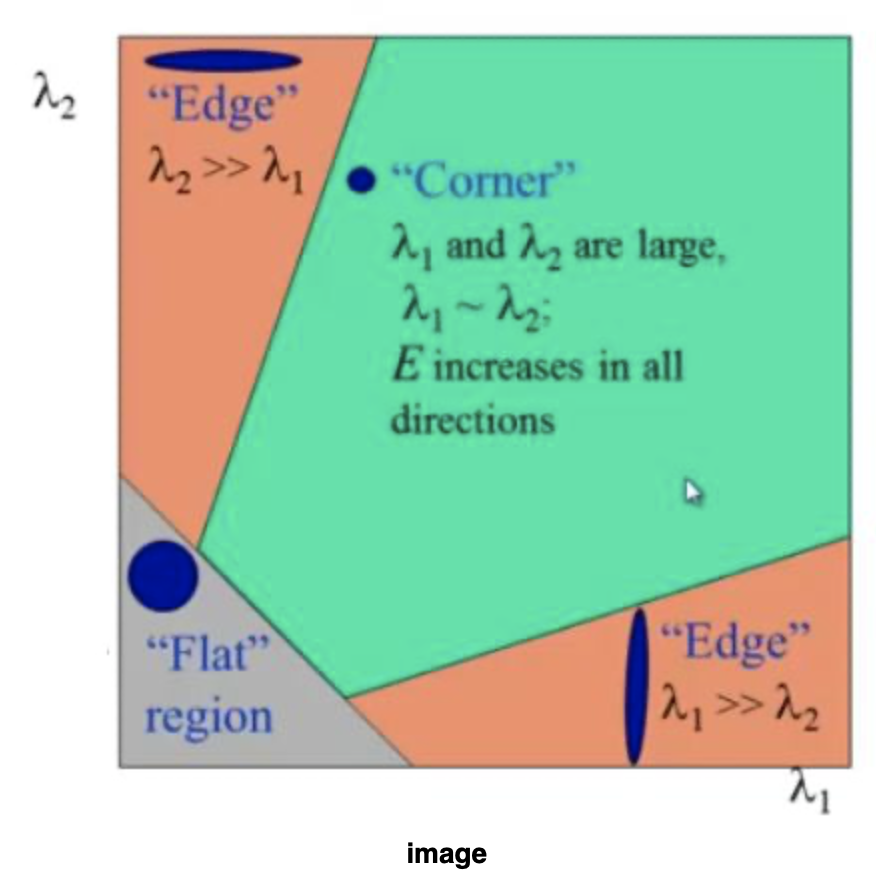

# cv2.cornerHarris(img, blocksize, ksize, k)
- img : grayscale and float32
- blockSize : 고려될 이웃 픽셀의 크기
- ksize : sobel 미분에 사용될 인자 (Ix, Iy 찾을때 사용)
- k : Harris detector free parameter in the equation

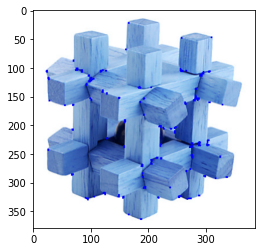

In [4]:
import cv2
import numpy as np

def cornerDetect():
    img = cv2.imread('/Users/sejongpyo/desktop/con.png')
    img2 = img.copy()
    imgray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    imgray = np.float32(imgray)
    dst = cv2.cornerHarris(imgray, 2, 3, 0.04)
    dst = cv2.dilate(dst, None) # 검출된 코너 부분 확대
    
    img2[dst > 0.01 * dst.max()] = [0, 0, 255]
    
    cv2.imshow('harris', img2)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
cornerDetect()

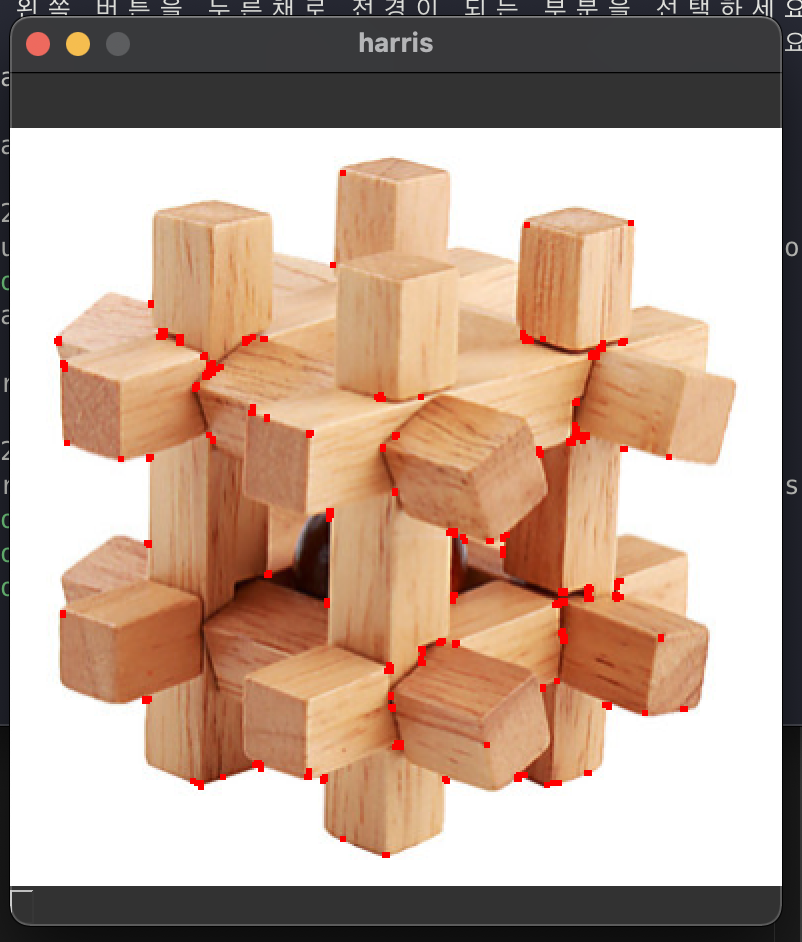

# Corner with Subpixel Accuracy
- 최대로 정확한 모서리를 찾을 때 사용
1. Harris corner를 먼저 찾는다
2. 찾은 모서리들의 중심을 대상으로 수정
3. 반복 중지를 위한 기준을 설정

In [ ]:
import cv2
import numpy as np

def cornerDetect():
    img = cv2.imread('/Users/sejongpyo/desktop/con.png')
    img2 = img.copy()
    imgray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    imgray = np.float32(imgray)
    dst = cv2.cornerHarris(imgray, 2, 3, 0.05)
    dst = cv2.dilate(dst, None) # 검출된 코너 부분 확대
    ret, dst = cv2.threshold(dst, 0.05 * dst.max(), 255, 0)
    dst = np.uint8(dst)

    # 중심 찾기
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

    # 멈추기 위한 기준
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv2.cornerSubPix(imgray, np.float32(centroids), (5, 5), (-1, -1), criteria)

    res = np.hstack((centroids, corners))
    res = np.int0(res)
    
    img[res[:, 1], res[:, 0]] = [0, 0, 255]
    img[res[:, 3], res[:, 2]] = [0, 255, 0]
    
    cv2.imshow('harris', img)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
cornerDetect()

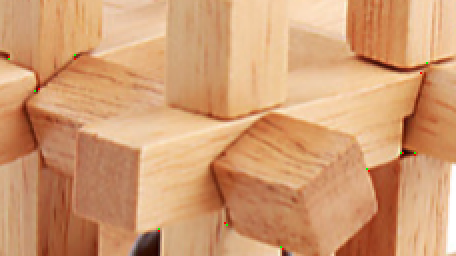